In [29]:
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
import pandas as pd 
import numpy as np  
import scipy as sp 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import numpy as np

plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size

# Duncan’s data set

## 1  Linear Regression

In [30]:
duncan = sm.datasets.get_rdataset("Duncan", "carData")

df = pd.DataFrame(data=duncan.data)

df['type'] = df['type'].astype('category') #change "type" to categorical

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, accountant to waiter
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   type       45 non-null     category
 1   income     45 non-null     int64   
 2   education  45 non-null     int64   
 3   prestige   45 non-null     int64   
dtypes: category(1), int64(3)
memory usage: 1.6+ KB


In [31]:
df.head(100) #get a quick look at a data frame

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


#### 1.1  Create histograms for income, education and prestige.  Comment the histograms.

    We have a few clear indication after comparing these plots: 
    
    - income and prestige seems to have a high correlation and there is an interesting contridiction of group "30 - 40" and "60 - 70" where shows complete opposite result.
    - low high school graduates in percentage is not highly correlated to either income or prestige of occupations whereas higher occupation do show correlations.
    - overall we can observe similarities between the three observations and it demonstates the income actually moreso distributed in the two-sides instead of normally distributed starting the middel and least in two-side on graph.

In [4]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

#set a subplot figure
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

#set the three columns I need for creating the historgrams
x1 = list(df['income'])
x2 = list(df['education'])
x3 = list(df['prestige'])

colors=['blue']
names=['income']
ax0.hist([x1], bins = 10, color=colors,label=names,edgecolor='black')
ax0.legend(prop={'size': 10})
ax0.set_xlabel('Individuals earning$3500 or more (%)')

colors=['green']
names=['education']
ax1.hist([x2], bins = 10, color=colors,label=names,edgecolor='black')
ax1.legend(prop={'size': 10})
ax1.set_xlabel('High-school Graduates (%)')

colors=['orange']
names=[ 'prestige']
ax2.hist([x3], bins = 10, color=colors,label=names,edgecolor='black')
ax2.legend(prop={'size': 10})
ax2.set_xlabel('Raters in a national survey who rated the occupation as good or better in prestige (%)')

fig.tight_layout()
plt.show()


NameError: name 'plt' is not defined

#### 1.2 Create scatter plots for income vs prestige and education vs prestige.  Comment the plots.

    We have a few clear indication after comparing these plots:
    
    - the variables are as predicted, after we took a look at histogram, could be quite highly correlated yet with a few extreme values revealed in the scatter plots. 
    
    - the scatter plots moreover support our prediction above that education and income or pretige has less or little correlaton. There appears to be majority of data points that are unusually far from the general pattern in the middle group which could be concluded as showing weak association.
    
    - the prestige and income shows high correlation with positve and strong association with few values shows extreme pattern.
  

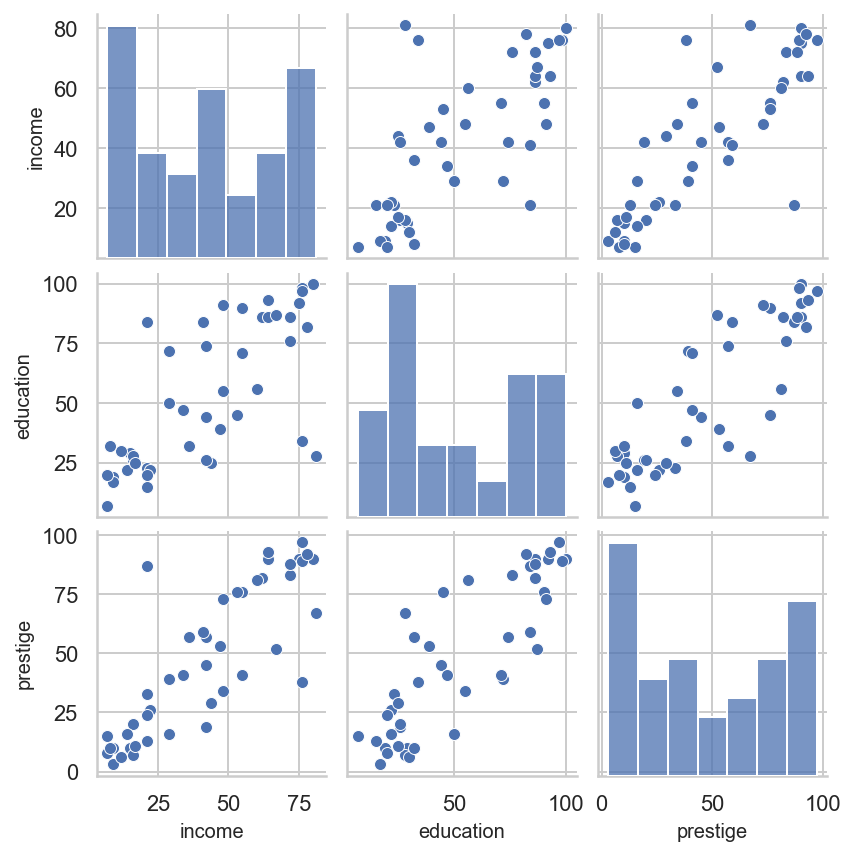

In [33]:
columns = ['income', 'education', 'prestige']

sns.pairplot(df.loc[:, columns], height=2)

plt.show()

#### 1.3 Create violin plots for income, prestige, and education.  Each of these plots, display a violin for eachof the 3 categories prof, bc, and wc.

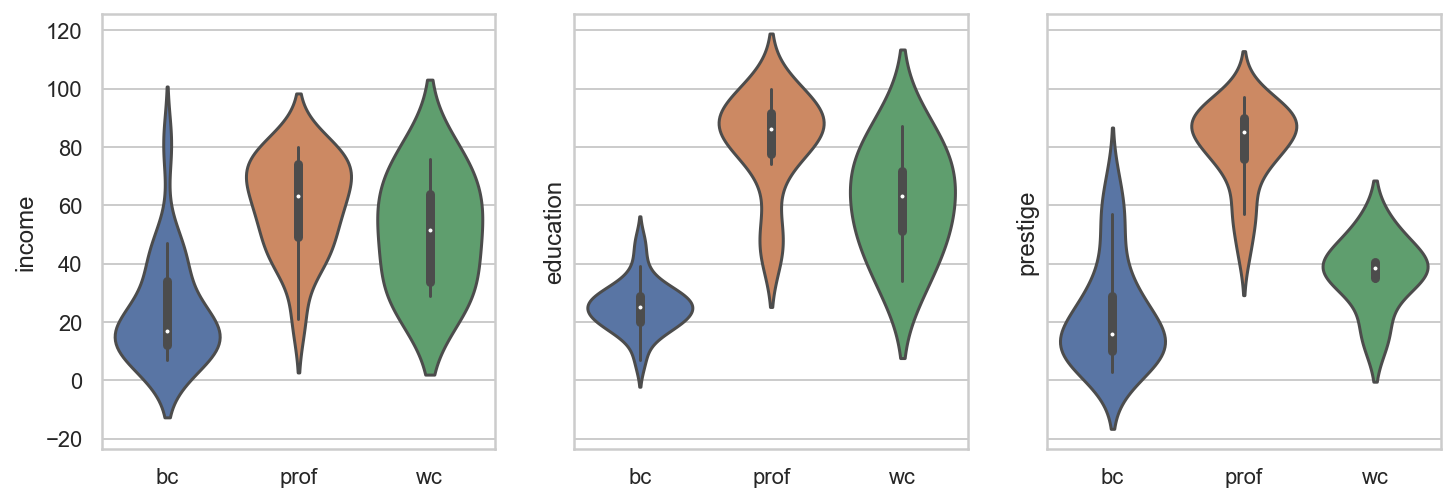

In [34]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))

t1 = df[df['type'] == 'prof']
t2 = df[df['type'] == 'bc']
t3 = df[df['type'] == 'wc']

sns.violinplot(x=t1["type"], y=t1['income'], ax=ax[0]).set(xlabel=None)
sns.violinplot(x=t2["type"], y=t2['income'], ax=ax[0]).set(xlabel=None)
sns.violinplot(x=t3["type"], y=t3['income'], ax=ax[0]).set(xlabel=None)

sns.violinplot(x=t1["type"], y=t1['education'], ax=ax[1]).set(xlabel=None)
sns.violinplot(x=t2["type"], y=t2['education'], ax=ax[1]).set(xlabel=None)
sns.violinplot(x=t3["type"], y=t3['education'], ax=ax[1]).set(xlabel=None)

sns.violinplot(x=t1["type"], y=t1['prestige'], ax=ax[2]).set(xlabel=None)
sns.violinplot(x=t2["type"], y=t2['prestige'], ax=ax[2]).set(xlabel=None)
sns.violinplot(x=t3["type"], y=t3['prestige'], ax=ax[2]).set(xlabel=None)
    
plt.show()


#### 1.1 Write down the estimates for ${β}_{i}$ for ${i} = 0, 1, 2.$
${prestige =β_0+β_1income +β_2education +ε.}$

${β_0 = -6.0647}$

${β_1 = 0.5987}$

${β_2 = 0.5458}$

In [35]:
import statsmodels.formula.api as smf

model = smf.ols("prestige ~ income + education", data = df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           8.65e-17
Time:                        20:45:38   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1.2 What are the p-values for the 3 coefficient estimates?  are they significant at the 5% level?
|parameters|p-values|
----------|------
|Intercept|0.163|
|income|0.000|
|education|0.000|	

Here both our variables income and education reject our null hypothesis and are significant at the 5% level. Our intercept, however, is not significant at 5% level (p>0.05). It is possibly due to the small amount of data thus not able to reject hypothesis that ${β_0 = 0}$

#### 1.3 What is interpretation of the education coefficient?  Be concrete

The coefficient of education is 0.5458, where ${β_0 > 0}$ stating that **every one increase unit of education will increase 0.5458 unit of our Y variable which is prestige**

#### 1.4 Calculate the error terms ${ε_i=y_i−\hat{y}_i}$,  and make a histogram of the error terms.  Do errors behaveaccording  to  OLS  theory?.   You  are  expected  to  calculate  the  errors  by  yourself,  and  not  using  anin-build function.

${residuals = actual y(y_i) - predicted y(\hat{y}_i)}$

it is shown that the errors do not behave to OLS theory according to OLS theory as we can see from the histogram where we assum our error term to have a normal distributon.

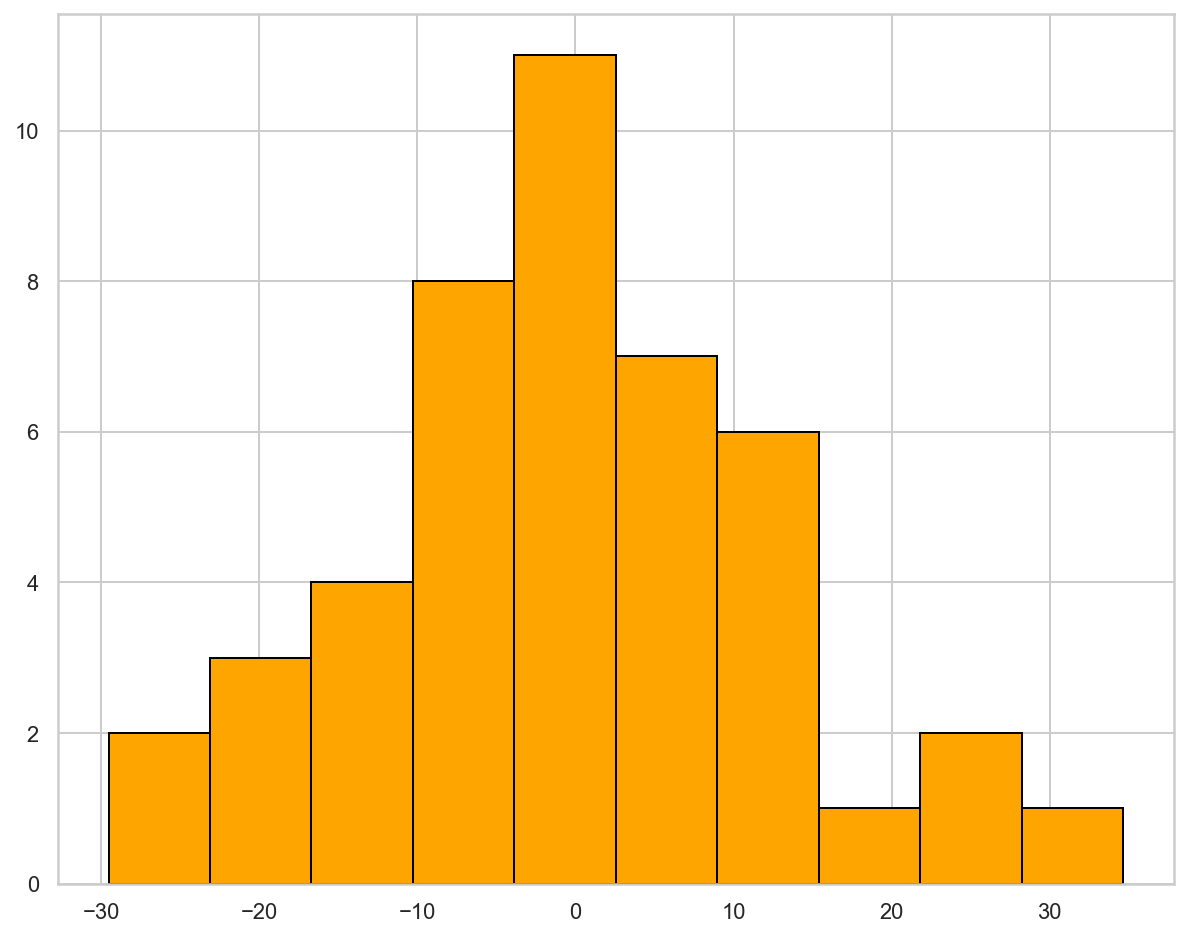

In [36]:
Y = df['prestige']

residuals = Y - model.predict()

plt.hist(residuals, bins = 10, color='orange', edgecolor='black')
plt.show()

## 2  Logistic Regression

#### 2.1  Creating an extra column in the Duncan’s data set wherey= 1 if type =prof, elsey= 0

In [37]:
df['popf_bin'] = np.where(df['type'] == 'prof',1,0)
df

,type,income,education,prestige,popf_bin
accountant,prof,62,86,82,1
pilot,prof,72,76,83,1
architect,prof,75,92,90,1
author,prof,55,90,76,1
chemist,prof,64,86,90,1
minister,prof,21,84,87,1
professor,prof,64,93,93,1
dentist,prof,80,100,90,1
reporter,wc,67,87,52,0
engineer,prof,72,86,88,1


#### 2.2  Fit the following logistic regression:  

In [53]:
glm0 = smf.glm(formula = "popf_bin ~ income + education + prestige", data = df, family=sm.families.Binomial()).fit()
glm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               popf_bin   No. Observations:                   45
Model:                            GLM   Df Residuals:                       41
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.6175
Date:                Tue, 04 Apr 2023   Deviance:                       9.2350
Time:                        00:21:17   Pearson chi2:                     16.1
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6804
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.3815      4.789     -2.168      0.030     -19.767      -0.996
income        -0.0988      0.074     -1.332      0.183      -0.244       0.047
education      0.0548      0.042      1.300      0.194      -0.028       0.138
prestige       0.2109      0.092      2.301      0.021       0.031       0.391
==============================================================================
"""

#### 2.3  Write down all coefficient estimates.  Are they significant at the 5% level?

${log(\frac{Pr((y=1|x)}{(1-Pr(y=1|x)})}$ = ${β_0+β_1income +β_2education +β_3prestige.}$

${β_0 = -9.9543}$

${β_1 = -0.0985}$

${β_2 = 0.0526}$

${β_3 = 0.2052}$

We can see that only our variable **prestige**, except our ${β_0}$, is significant at the 5% level whereas the rest of our variables accept null hypothesis (p>0.05).

#### 2.4 (a)  Model 1

${log(\frac{Pr((y=1|x)}{(1-Pr(y=1|x)})}$ = ${β_0+β_1income.}$

In [42]:
glm1 = smf.glm(formula = "popf_bin ~ income", data = df, family=sm.families.Binomial()).fit()
glm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               popf_bin   No. Observations:                   45
Model:                            GLM   Df Residuals:                       43
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20.641
Date:                Tue, 04 Apr 2023   Deviance:                       41.282
Time:                        00:18:06   Pearson chi2:                     42.5
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3486
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5220      1.018     -3.460      0.001      -5.517      -1.527
income         0.0689      0.020      3.503      0.000       0.030       0.107
==============================================================================
"""

#### 2.4 (b)  Model 2

${log(\frac{Pr((y=1|x)}{(1-Pr(y=1|x)})}$ = ${β_0+β_1education.}$

In [43]:
glm2 = smf.glm(formula = "popf_bin ~ education", data = df, family=sm.families.Binomial()).fit()
glm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               popf_bin   No. Observations:                   45
Model:                            GLM   Df Residuals:                       43
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.767
Date:                Tue, 04 Apr 2023   Deviance:                       25.534
Time:                        00:18:08   Pearson chi2:                     29.6
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5409
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.6491      1.515     -3.730      0.000      -8.617      -2.681
education      0.0906      0.023      3.923      0.000       0.045       0.136
==============================================================================
"""

#### 2.4 (c)  Model 3

${log(\frac{Pr((y=1|x)}{(1-Pr(y=1|x)})}$ = ${β_0+β_1prestige.}$

In [44]:
glm3 = smf.glm(formula = "popf_bin ~ prestige", data = df, family=sm.families.Binomial()).fit()
glm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               popf_bin   No. Observations:                   45
Model:                            GLM   Df Residuals:                       43
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7.1377
Date:                Tue, 04 Apr 2023   Deviance:                       14.275
Time:                        00:18:09   Pearson chi2:                     15.4
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6426
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7383      3.033     -2.881      0.004     -14.684      -2.793
prestige       0.1510      0.052      2.911      0.004       0.049       0.253
==============================================================================
"""

#### 2.4 What are the ${β_1}$ estimates and their p-values in the 3 different models?

|model|AIC |Pseudo ${R^2}$ |
---|---|---
|Equation$_{I1}$|17.235|0.6804|
|Equation$_{a}$|45.282|0.3486|
|Equation$_{b}$|29.534|0.5409|
|Equation$_{c}$|18.275|0.6426|

In [57]:
glm0.bic

-146.83812723795532

In [56]:
glm1.bic

-122.40421239911949

In [55]:
glm2.bic

-138.15213724768685

In [54]:
glm3.bic

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


-149.4111490491889

#### 2.5 Which of the 4 models makes the most sense for classifying whether a person has a managerial typejob?  Argue (briefly) from a statistical point of view.

Model (c) with prestige is the model that makes the most sense for classifying 

- firstly the p-values is significant at the 5% level
- it also presents the lowest AIC score of all models